# Price Prediction Of my Bike

In [1]:
# About The Project 
# In This Project , The Price Of my bajaj pulsar will be predicted using one of the Machine Learning models before predicting
# we will clean the data if the need be we will check for null values and analyse the data.Lets Begin!!

# Data Dictionary

1. bike name (categorical) 
1. price of the bike(numerical)
1. city in which the bike is available(categorical)
1. kilometers driven(numerical)
1. how many owner it have
1. age of the vehicle
1. power of the vehicle
1. brand of the vehicle

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing The Data

In [3]:
Used_Bike_Price = pd.read_csv("Used_Bikes.csv")

In [4]:
Used_Bike_Price

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [5]:
Used_Bike_Price.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [6]:
Used_Bike_Price.shape

(32648, 8)

In [7]:
Used_Bike_Price.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
Used_Bike_Price.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [9]:
## check the number of null values in all columns
## if any, remove/replace them as per the type of data
Used_Bike_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [10]:
Used_Bike_Price.isnull()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
32643,False,False,False,False,False,False,False,False
32644,False,False,False,False,False,False,False,False
32645,False,False,False,False,False,False,False,False
32646,False,False,False,False,False,False,False,False


In [11]:
Used_Bike_Price.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [12]:
Used_Bike_Price.count()

bike_name     32648
price         32648
city          32648
kms_driven    32648
owner         32648
age           32648
power         32648
brand         32648
dtype: int64

In [13]:
Used_Bike_Price['bike_name'].value_counts()

Bajaj Pulsar 150cc                                   2776
Bajaj Avenger Street 220                             2531
Bajaj Avenger 220cc                                  2060
Royal Enfield Classic 350cc                          1673
Hero Passion Pro 100cc                               1432
                                                     ... 
Indian Chief Classic 1800cc                             1
TVS Apache RTR 160cc White Race Edition Rear Disc       1
Triumph Bonneville T100 900cc                           1
Bajaj CT110 ES Alloy                                    1
Yamaha FZS FI 150cc Special Edition                     1
Name: bike_name, Length: 471, dtype: int64

In [14]:
Used_Bike_Price['bike_owner_no']=Used_Bike_Price['owner'].apply(lambda x:x.strip().split(' ')[0])

In [15]:
Used_Bike_Price.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,bike_owner_no
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS,First
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield,First
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph,First
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS,First
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha,First


In [16]:
Used_Bike_Price=Used_Bike_Price.drop(['owner'],axis=1)

In [17]:
Used_Bike_Price.head()

,bike_name,price,city,kms_driven,age,power,brand,bike_owner_no
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,3.0,110.0,TVS,First
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,4.0,350.0,Royal Enfield,First
2,Triumph Daytona 675R,600000.0,Delhi,110.0,8.0,675.0,Triumph,First
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,4.0,180.0,TVS,First
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,3.0,150.0,Yamaha,First


In [18]:
Used_Bike_Price['bike_name'].value_counts()

Bajaj Pulsar 150cc                                   2776
Bajaj Avenger Street 220                             2531
Bajaj Avenger 220cc                                  2060
Royal Enfield Classic 350cc                          1673
Hero Passion Pro 100cc                               1432
                                                     ... 
Indian Chief Classic 1800cc                             1
TVS Apache RTR 160cc White Race Edition Rear Disc       1
Triumph Bonneville T100 900cc                           1
Bajaj CT110 ES Alloy                                    1
Yamaha FZS FI 150cc Special Edition                     1
Name: bike_name, Length: 471, dtype: int64

# DATA VISUALIZATION

# Owners vs Price

<AxesSubplot:xlabel='price', ylabel='bike_owner_no'>

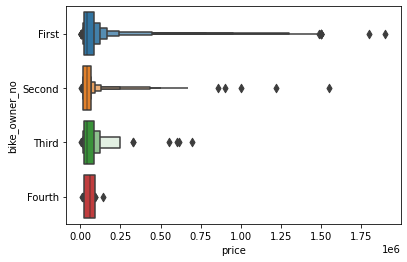

In [19]:
sns.boxenplot(x="price",y="bike_owner_no",data=Used_Bike_Price)

# Brand vs Price

<AxesSubplot:xlabel='brand', ylabel='price'>

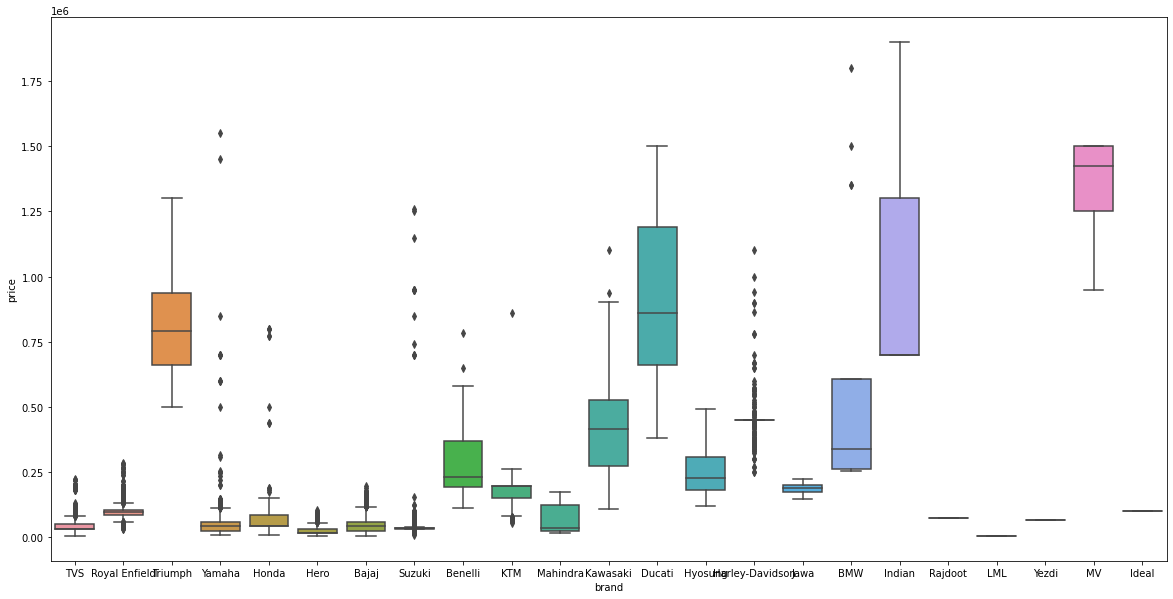

In [20]:
plt.figure(figsize = (20,10))
sns.boxplot(x="brand",y="price",data=Used_Bike_Price)

# Kilometers Driven VS Price

<AxesSubplot:xlabel='price', ylabel='kms_driven'>

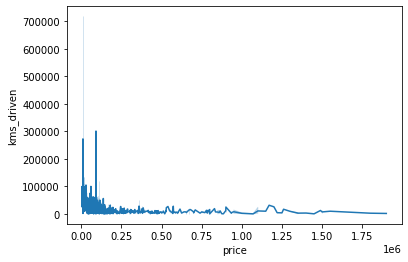

In [21]:
#used bike price based on kms driven
sns.lineplot(x="price",y="kms_driven",data=Used_Bike_Price )

# Power VS Price

<AxesSubplot:xlabel='age', ylabel='price'>

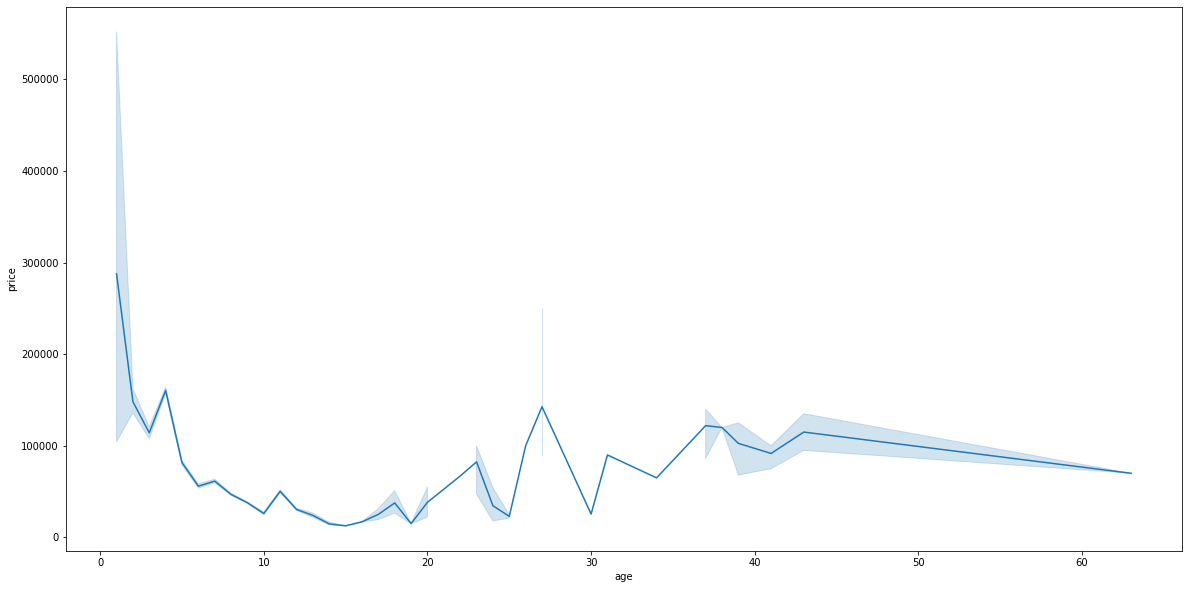

In [22]:
#used bike price based on age
plt.figure(figsize = (20,10))
sns.lineplot(x='age',y='price',data=Used_Bike_Price)

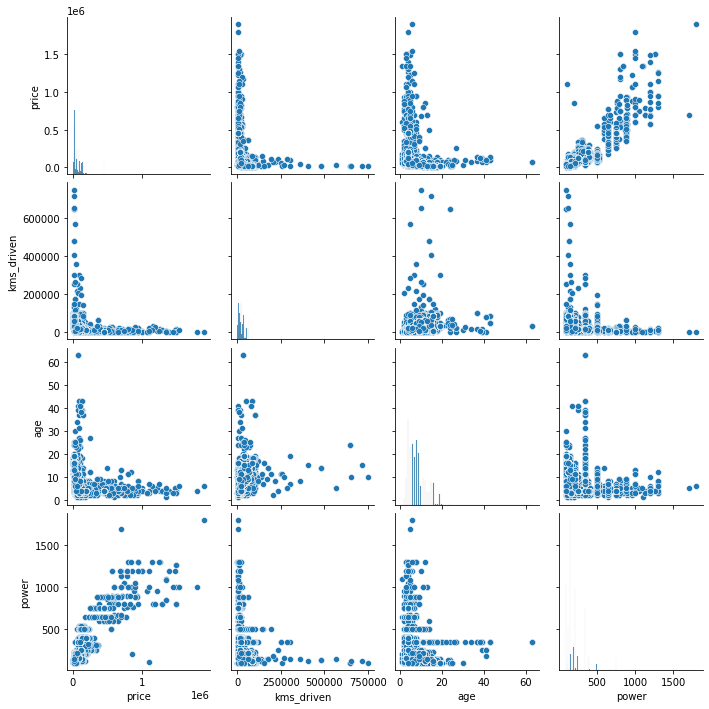

In [23]:
#Plotting the pair plots of the dataset
sns.pairplot(Used_Bike_Price)

# Data Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

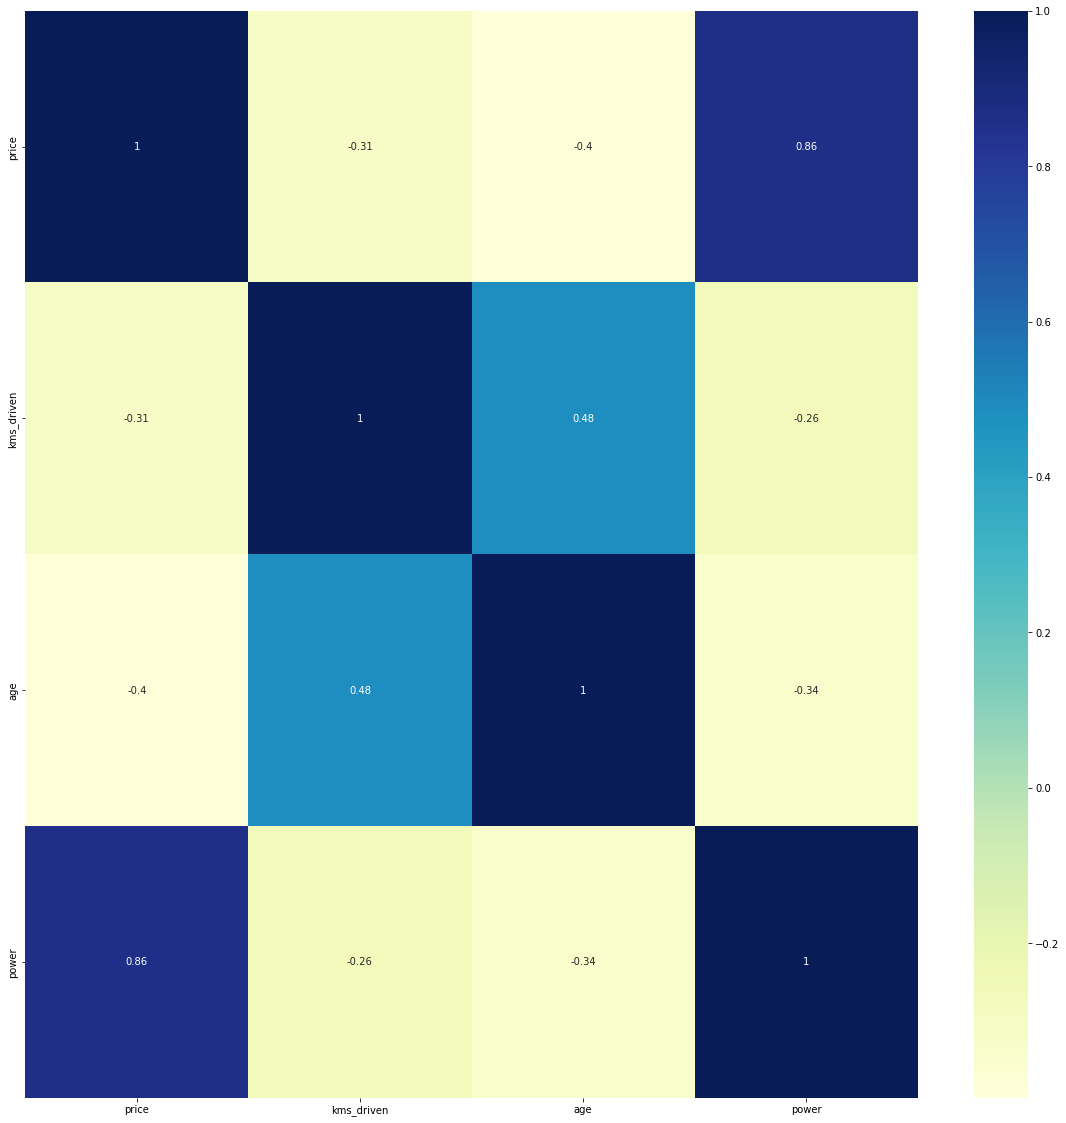

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(Used_Bike_Price.corr(),cmap="YlGnBu",annot=True)
plt.show

In [25]:
Used_Bike_Price

,bike_name,price,city,kms_driven,age,power,brand,bike_owner_no
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,3.0,110.0,TVS,First
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,4.0,350.0,Royal Enfield,First
2,Triumph Daytona 675R,600000.0,Delhi,110.0,8.0,675.0,Triumph,First
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,4.0,180.0,TVS,First
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,3.0,150.0,Yamaha,First
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,4.0,100.0,Hero,First
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,9.0,180.0,TVS,First
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,6.0,220.0,Bajaj,First
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,16.0,125.0,Hero,First


In [26]:
used_bike_price=Used_Bike_Price.drop(['bike_name'],axis=1)
used_bike_price
used_bike_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          32648 non-null  float64
 1   city           32648 non-null  object 
 2   kms_driven     32648 non-null  float64
 3   age            32648 non-null  float64
 4   power          32648 non-null  float64
 5   brand          32648 non-null  object 
 6   bike_owner_no  32648 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


In [27]:
variables=used_bike_price.select_dtypes(include=['object'])
variables.head()

,city,brand,bike_owner_no
0,Ahmedabad,TVS,First
1,Delhi,Royal Enfield,First
2,Delhi,Triumph,First
3,Bangalore,TVS,First
4,Bangalore,Yamaha,First


In [28]:
dummies=pd.get_dummies(variables)
dummies

,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,city_Ahmednagar,city_Ajmer,city_Akot,...,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi,bike_owner_no_First,bike_owner_no_Fourth,bike_owner_no_Second,bike_owner_no_Third
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32644,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
32645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
#creating the dummy variables
dummies=pd.get_dummies(variables)
used_bike=pd.concat([used_bike_price,dummies],axis=1)

In [30]:
used_bike=used_bike.drop(['city','brand','bike_owner_no'],axis=1)

In [31]:
used_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Columns: 474 entries, price to bike_owner_no_Third
dtypes: float64(4), uint8(470)
memory usage: 15.6 MB


In [32]:
used_bike.head(10)

,price,kms_driven,age,power,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,...,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi,bike_owner_no_First,bike_owner_no_Fourth,bike_owner_no_Second,bike_owner_no_Third
0,35000.0,17654.0,3.0,110.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,119900.0,11000.0,4.0,350.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,600000.0,110.0,8.0,675.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,65000.0,16329.0,4.0,180.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,80000.0,10000.0,3.0,150.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,53499.0,25000.0,6.0,150.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6,85000.0,8200.0,3.0,160.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,45000.0,12645.0,3.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,145000.0,9190.0,3.0,350.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9,88000.0,19000.0,7.0,500.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


#     Setting X And Y

In [33]:
X=used_bike.drop(['price'],axis=1)
X

,kms_driven,age,power,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,...,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi,bike_owner_no_First,bike_owner_no_Fourth,bike_owner_no_Second,bike_owner_no_Third
0,17654.0,3.0,110.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,11000.0,4.0,350.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,110.0,8.0,675.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,16329.0,4.0,180.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,10000.0,3.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,22000.0,4.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32644,6639.0,9.0,180.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
32645,20373.0,6.0,220.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32646,84186.0,16.0,125.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
y=used_bike['price']
y

0         35000.0
1        119900.0
2        600000.0
3         65000.0
4         80000.0
           ...   
32643     39000.0
32644     30000.0
32645     60000.0
32646     15600.0
32647     22000.0
Name: price, Length: 32648, dtype: float64

# Splitting The Data Into The Train And The Test Sets

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [36]:
X_train

,kms_driven,age,power,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,...,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi,bike_owner_no_First,bike_owner_no_Fourth,bike_owner_no_Second,bike_owner_no_Third
17390,7127.0,5.0,220.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19014,32588.0,9.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16949,22000.0,4.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25968,32588.0,9.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
380,19000.0,5.0,160.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,20000.0,4.0,350.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5390,9800.0,6.0,150.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
860,17000.0,5.0,160.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15795,20000.0,6.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
y_train

17390     80000.0
19014     25000.0
16949     39000.0
25968     25000.0
380       42000.0
           ...   
29802    105000.0
5390      48000.0
860       45000.0
15795     23000.0
23654     41000.0
Name: price, Length: 26118, dtype: float64

In [38]:
X_test

,kms_driven,age,power,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,...,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi,bike_owner_no_First,bike_owner_no_Fourth,bike_owner_no_Second,bike_owner_no_Third
28994,22824.0,8.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31433,42837.0,8.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17250,64955.0,15.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13738,36000.0,15.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24577,16336.0,7.0,350.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21858,52000.0,10.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
11813,48587.0,8.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7033,20000.0,4.0,883.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7406,25400.0,5.0,150.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
y_test

28994     18000.0
31433     43000.0
17250     10000.0
13738     14227.0
24577     87000.0
           ...   
21858     20000.0
11813     25000.0
7033     670000.0
7406      46000.0
31555     70000.0
Name: price, Length: 6530, dtype: float64

In [40]:
len(X_train)

26118

In [41]:
len(X_test)


6530

# Model for prediction

# Random Forest Regressor Model

In [42]:
from sklearn.ensemble import RandomForestRegressor


In [43]:
modell=RandomForestRegressor()

In [44]:
modell.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
a= modell.score(X_test,y_test)*100
print("percentage of accuracy =",a,"%")

percentage of accuracy = 93.71047056831024 %


In [46]:
prediction=modell.predict(X_test)
prediction

array([ 18000.  ,  43000.  ,  10000.  , ..., 690649.74,  35552.  ,
        70000.  ])

Text(0, 0.5, 'prediction')

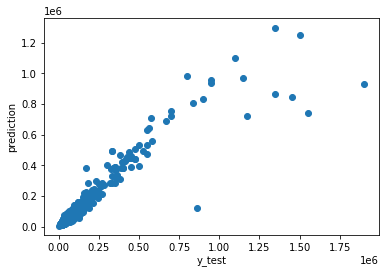

In [47]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')

# We see that random forest gives an accuracy of almost 94% 

# Let's start predicting using Random Forest Regressor Model because it is decently accurate

In [48]:
df=pd.read_csv('bike_details.csv')
df.head(1)

,kms_driven,age,power,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,...,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi,bike_owner_no_First,bike_owner_no_Fourth,bike_owner_no_Second,bike_owner_no_Third
0,27000,3,160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 473 entries, kms_driven to bike_owner_no_Third
dtypes: int64(473)
memory usage: 3.8 KB


In [50]:
print("the price of your bike is=Rs.",(int)(modell.predict(df)[0]))

the price of your bike is=Rs. 65774
